# Gaussian Process

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel
np.random.seed(0)
sns.set_context("talk")

In [2]:
# hyper parameter
N_train = 10
kernel = lambda X, Y: rbf_kernel(X, Y, gamma=0.5)
keps = 1e-8
sigma_y = 0.2

In [3]:
def make_dataset(N):
    X = (np.random.rand(N, 1) - .5 ) * 10.
    y = np.sin(X)
    return X, y

## Priori of Gaussian Process
$$f({\bf x})\sim GP(m({\bf x}), \kappa({\bf x}, {\bf x'}))$$
$$m({\bf x})=0$$

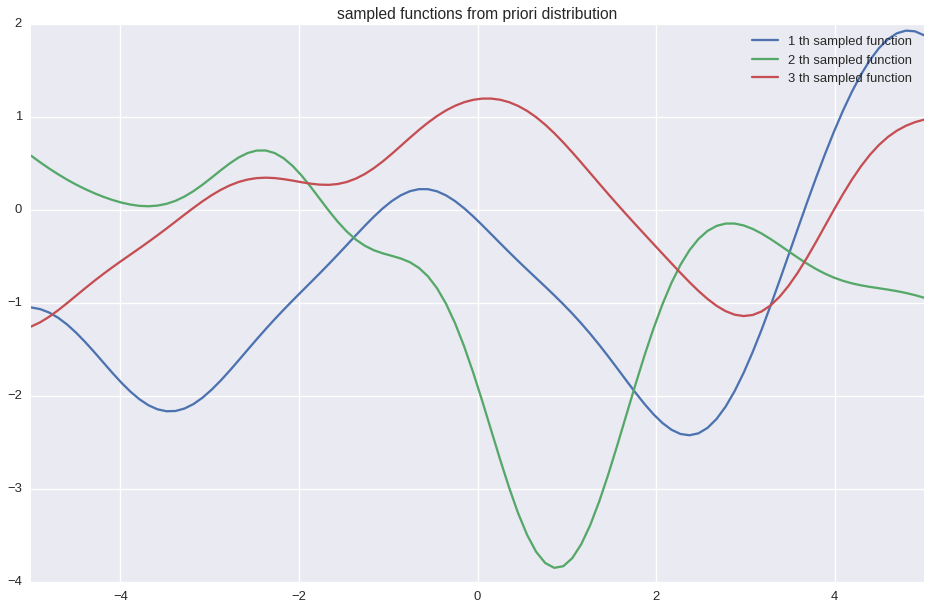

In [4]:
# priori
plt.figure(figsize=(16, 10))
xs = np.linspace(-5, 5, 100).reshape(-1, 1)
for i in range(3):
    fs_prior = np.random.multivariate_normal(mean=np.zeros(len(xs)), cov=kernel(xs, xs) + keps * np.identity(len(xs)))
    plt.plot(xs, fs_prior, label="{} th sampled function".format(i + 1))
plt.xlim(-5, 5)
plt.legend()
plt.title("sampled functions from priori distribution")
plt.savefig("priori.png")

## Gaussian Process for noise-free observations
$$p({\bf f}_* | {\bf X}_*, {\bf X}, {\bf f})=\mathscr{N}({\bf f}_*|{\bf \mu}_*, {\bf \Sigma}_*)$$
$${\bf \mu}_* = {\bf \mu}({\bf X}_*) + {\bf K}^T_*{\bf K}^{-1}({\bf f} - {\bf \mu}({\bf X}))$$
$${\bf \Sigma}_*={\bf K}_{**}-{\bf K}^T_*{\bf K}^{-1}{\bf K}_*$$

In [5]:
# training (noise free)
X_train, y_train = make_dataset(N_train)
K = kernel(X_train, X_train)
Ks = kernel(X_train, xs)
Kss = kernel(xs, xs) + keps * np.identity(len(xs))
Ks_t = np.transpose(Ks)
mu_post = np.dot(Ks_t, np.linalg.solve(K, y_train))
cov_post = Kss - np.dot(Ks_t, np.linalg.solve(K, Ks))

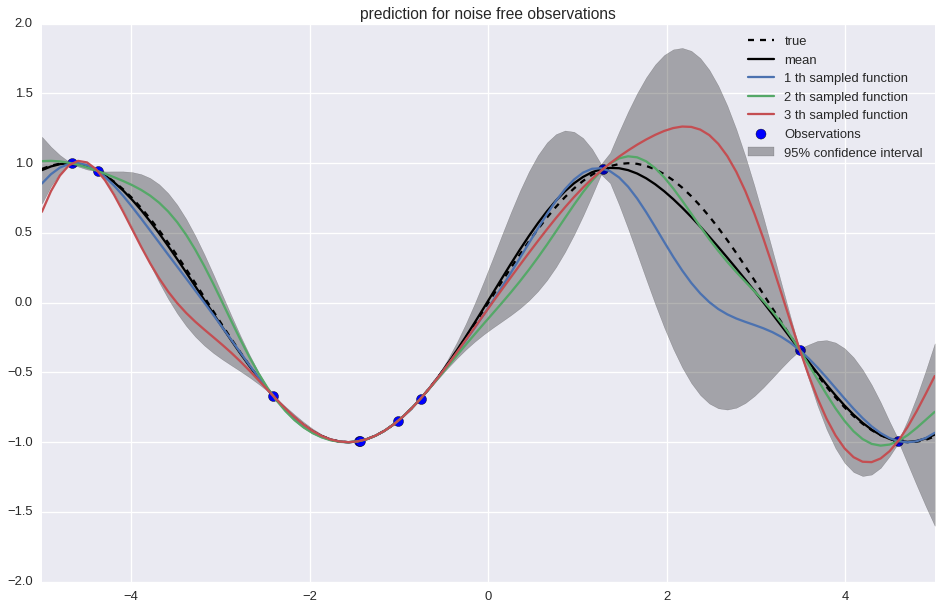

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(xs, np.sin(xs), "--", color="black", label="true")
plt.plot(xs, mu_post, color="black", label="mean")
plt.scatter(X_train, y_train, s=100, label="Observations")
for i in range(3):
    fs_post = np.random.multivariate_normal(mean=mu_post.reshape(-1), cov=cov_post)
    plt.plot(xs, fs_post, label="{} th sampled function".format(i + 1))
upper = mu_post.reshape(-1) + 2 * np.sqrt(np.diag(cov_post))
lower = mu_post.reshape(-1) - 2 * np.sqrt(np.diag(cov_post))
plt.fill_between(xs.reshape(-1), lower, upper, color="black", alpha=0.3, label="95% confidence interval")
plt.xlim(-5, 5)
plt.legend()
plt.title("prediction for noise free observations")
plt.savefig("noise_free.png")

## Gaussian Process for noisy observations
$${\bf K}_y = {\bf K} + \sigma^2_y {\bf I}_N$$
$$p({\bf f}_* | {\bf X}_*, {\bf X}, {\bf f})=\mathscr{N}({\bf f}_*|{\bf \mu}_*, {\bf \Sigma}_*)$$
$${\bf \mu}_* = {\bf \mu}({\bf X}_*) + {\bf K}^T_*{\bf K}^{-1}_y({\bf f} - {\bf \mu}({\bf X}))$$
$${\bf \Sigma}_*={\bf K}_{**}-{\bf K}^T_*{\bf K}^{-1}_y{\bf K}_*$$

In [7]:
# training (noisy observations)
noise = sigma_y * np.random.randn(N_train, 1)
y_train_with_noise = y_train + noise
Ky = K + sigma_y ** 2 * np.identity(len(K))
mu_post = np.dot(Ks_t, np.linalg.solve(Ky, y_train_with_noise))
cov_post = Kss - np.dot(Ks_t, np.linalg.solve(Ky, Ks))

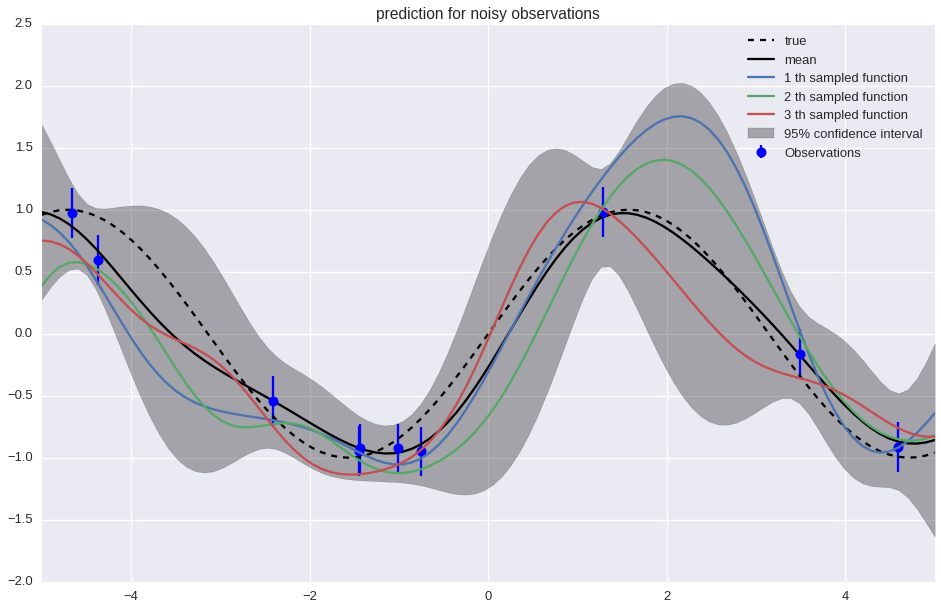

In [8]:
plt.figure(figsize=(16, 10))
plt.plot(xs, np.sin(xs), "--", color="black", label="true")
plt.plot(xs, mu_post, color="black", label="mean")
plt.errorbar(X_train, y_train_with_noise, sigma_y, fmt="b.", markersize=20, label="Observations")
for i in range(3):
    fs_post = np.random.multivariate_normal(mean=mu_post.reshape(-1), cov=cov_post)
    plt.plot(xs, fs_post, label="{} th sampled function".format(i + 1))
upper = mu_post.reshape(-1) + 2 * np.sqrt(np.diag(cov_post))
lower = mu_post.reshape(-1) - 2 * np.sqrt(np.diag(cov_post))
plt.fill_between(xs.reshape(-1), lower, upper, color="black", alpha=0.3, label="95% confidence interval")
plt.xlim(-5, 5)
plt.legend()
plt.title("prediction for noisy observations")
plt.savefig("noisy.png")